# Export-Import Bank's Exchange Rate

# Library

In [1]:
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Setting (KEY & DATE)


In [2]:
HTTP = "https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?"
API_KEY = "authkey=sIbfRb10DOuATKBkPxCC5iGtneqKVjh2"
DATE = "20200103"
REQUEST_TYPE = "&data=AP01"

## API 가져오기

In [3]:
response = requests.get(HTTP + API_KEY + "&searchdate=" + DATE + REQUEST_TYPE)
data = json.loads(response.text)

## 요청변수(Requester Parameter)

|  <center>변수명</center> |  <center>타입</center> |  <center>변수설명</center> |  <center>값설명</center> |
|:--------|:--------:|--------:|--------:|
|<center>**authkey** </center> | <center>**string(필수)** </center> | <center>**인증키** </center> | <center>**OpenAPI 신청시 발급된 인증키** </center> |
|<center>**searchdate** </center> | <center>**string** </center> | <center>**검색요청날짜** </center> | <center>**ex) 2015-01-01, 20150101, (DEFAULT)현재일** </center> |
|<center>**data** </center> | <center>**string(필수)** </center> | <center>**검색요청API타입** </center> | <center>**AP01 : 환율, AP02 : 대출금리, AP03 : 국제금리** </center> |

## 출력결과(Response Element)

|  <center>변수명</center> |  <center>타입</center> |  <center>변수설명</center> |  <center>값설명</center> |
|:--------|:--------:|--------:|--------:|
|<center>**RESULT** </center> | <center>**Integer** </center> | <center>**조회결과** </center> | <center>**1 : 성공, 2 : DATA코드 오류, 3 : 인증코드 오류, 4 : 일일제한횟수 마감** </center> |
|<center>**CUR_UNIT** </center> | <center>**string** </center> | <center>**통화코드** </center> | <center>**?**</center> |
|<center>**CUR_NM** </center> | <center>**string** </center> | <center>**국가/통화명** </center> | <center>**?**</center> |
|<center>**TTB** </center> | <center>**string** </center> | <center>**전신환(송금받으실때)** </center> | <center>**?**</center> |
|<center>**TTS** </center> | <center>**string** </center> | <center>**전신환(송금보내실때)** </center> | <center>**?**</center> |
|<center>**DEAL_BAS_R** </center> | <center>**string** </center> | <center>**매매기준율** </center> | <center>**?**</center> |
|<center>**BKPR** </center> | <center>**string** </center> | <center>**장부가격** </center> | <center>**?**</center> |
|<center>**YY_EFEE_R** </center> | <center>**string** </center> | <center>**년환가료율** </center> | <center>**?**</center> |
|<center>**TEN_DD_EFEE_R** </center> | <center>**string** </center> | <center>**10일환가료율** </center> | <center>**?**</center> |
|<center>**KFTC_DEAL_BAS_R** </center> | <center>**string** </center> | <center>**서울외국환중계매매기준율** </center> | <center>**?**</center> |
|<center>**KFTC_BKPR** </center> | <center>**string** </center> | <center>**서울외국환중계 장부가격** </center> | <center>**?**</center> |

## 환율 제공 국가

In [4]:
for d in data:
    print(d["cur_unit"], d["cur_nm"], d["deal_bas_r"])

AED 아랍에미리트 디르함 314.96
AUD 호주 달러 808.04
BHD 바레인 디나르 3,068.62
BND 브루나이 달러 858.65
CAD 캐나다 달러 890.88
CHF 스위스 프랑 1,190.84
CNH 위안화 166.12
DKK 덴마아크 크로네 172.98
EUR 유로 1,292.66
GBP 영국 파운드 1,520.46
HKD 홍콩 달러 148.54
IDR(100) 인도네시아 루피아 8.33
JPY(100) 일본 옌 1,065.53
KRW 한국 원 1
KWD 쿠웨이트 디나르 3,815.38
MYR 말레이지아 링기트 283.03
NOK 노르웨이 크로네 131.55
NZD 뉴질랜드 달러 774.78
SAR 사우디 리얄 308.42
SEK 스웨덴 크로나 123.54
SGD 싱가포르 달러 858.65
THB 태국 바트 38.37
USD 미국 달러 1,156.9


## USD 2019 환율

In [5]:
CTY = "USD"

# 날짜 지정
DATE_2019 = pd.date_range("2019-1-1", "2019-12-31", freq="B")

# 저장 데이터프레임
DATE2019 = list()
USD2019 = list()

for i in DATE_2019 : 
    
    # 2019-01-01 형태로 변환
    DATE = i.strftime('%Y-%m-%d')
    
    # 일자별 달러 환율 가져오기
    response = requests.get(HTTP + API_KEY + "&searchdate=" + DATE + REQUEST_TYPE)
    data = json.loads(response.text)
    
    # USD 매매기준가 저장
    for d in data:
        if d["cur_unit"] == CTY : 
            DATE2019.append(DATE)
            d["deal_bas_r"] = d["deal_bas_r"].replace(",","")
            USD2019.append(np.float(d["deal_bas_r"]))
            continue

# 결과 생성
USD = pd.DataFrame({"DATE" : DATE2019, "USD" : USD2019})

# DATE를 DATE 타입으로 변환
USD.DATE = pd.to_datetime(USD.DATE)

# DATE를 인덱스로 변환
USD = USD.set_index("DATE")

## 환율 시각화

C:\Users\user\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


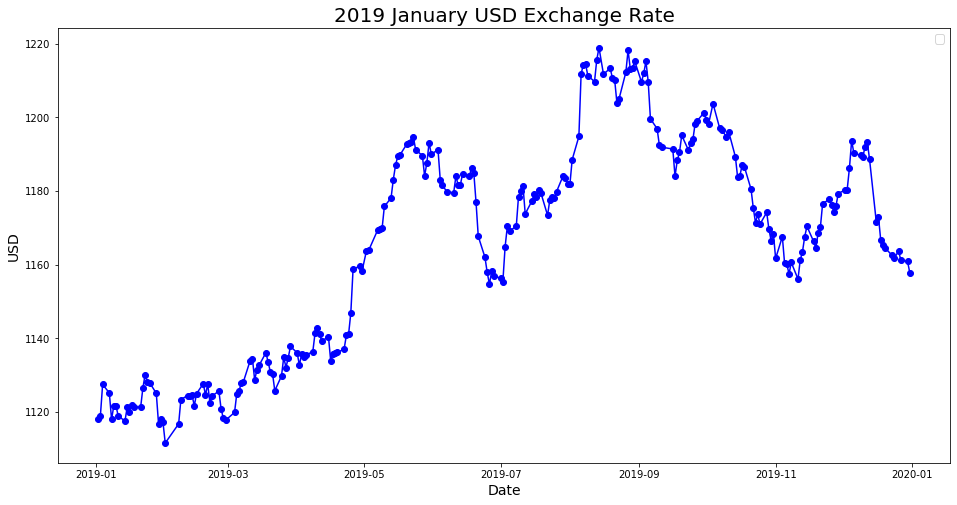

In [6]:
fig = plt.figure(figsize=(16,8))
fig.patch.set_facecolor('xkcd:white')
plt.plot(USD.index, USD["USD"], marker='o', color='b')
plt.title('2019 January USD Exchange Rate', fontsize=20) 
plt.ylabel('USD', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()